# Experiments on the use of the different estimated distributions in the 2D case with toy data, for classification purposes

In [1]:
run init.ipynb

Done.


In [ ]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN

verbosity=0


df = create_df()

df_moons = df.query(" `dataset_name` == 'moons' ")
df_circles = df.query(" `dataset_name` == 'circles' ")
#df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio").drop_duplicates()


## Intro: Illustration of the 5 missingness Patterns exploited

These appear to be pretty fundamental, so they might be enough to cover any situations (or causal dependence on the three variables X, Y and Z), using combinations of them.


1) Pattern 1: There are no mutual information between Z and X, Y     

2) Pattern 2: There are mutual information between Z and X (if X_1=0 then Z_2=1 and vice-versa), but not between Z and Y

3) Pattern 3: There are mutual information between Z and X (Z_1 and Z_2 depend on X_1 and X_2), but not between Z and Y

4) Pattern 4: There are no mutual information between Z and X, but there are between Z and Y (one class has higher rate of missing value)

5) Pattern 5: There are mutual information between Z and X (Z_1 and Z_2 depend on X_1 and X_2), and between Z and Y (one class has higher rate of missing value)


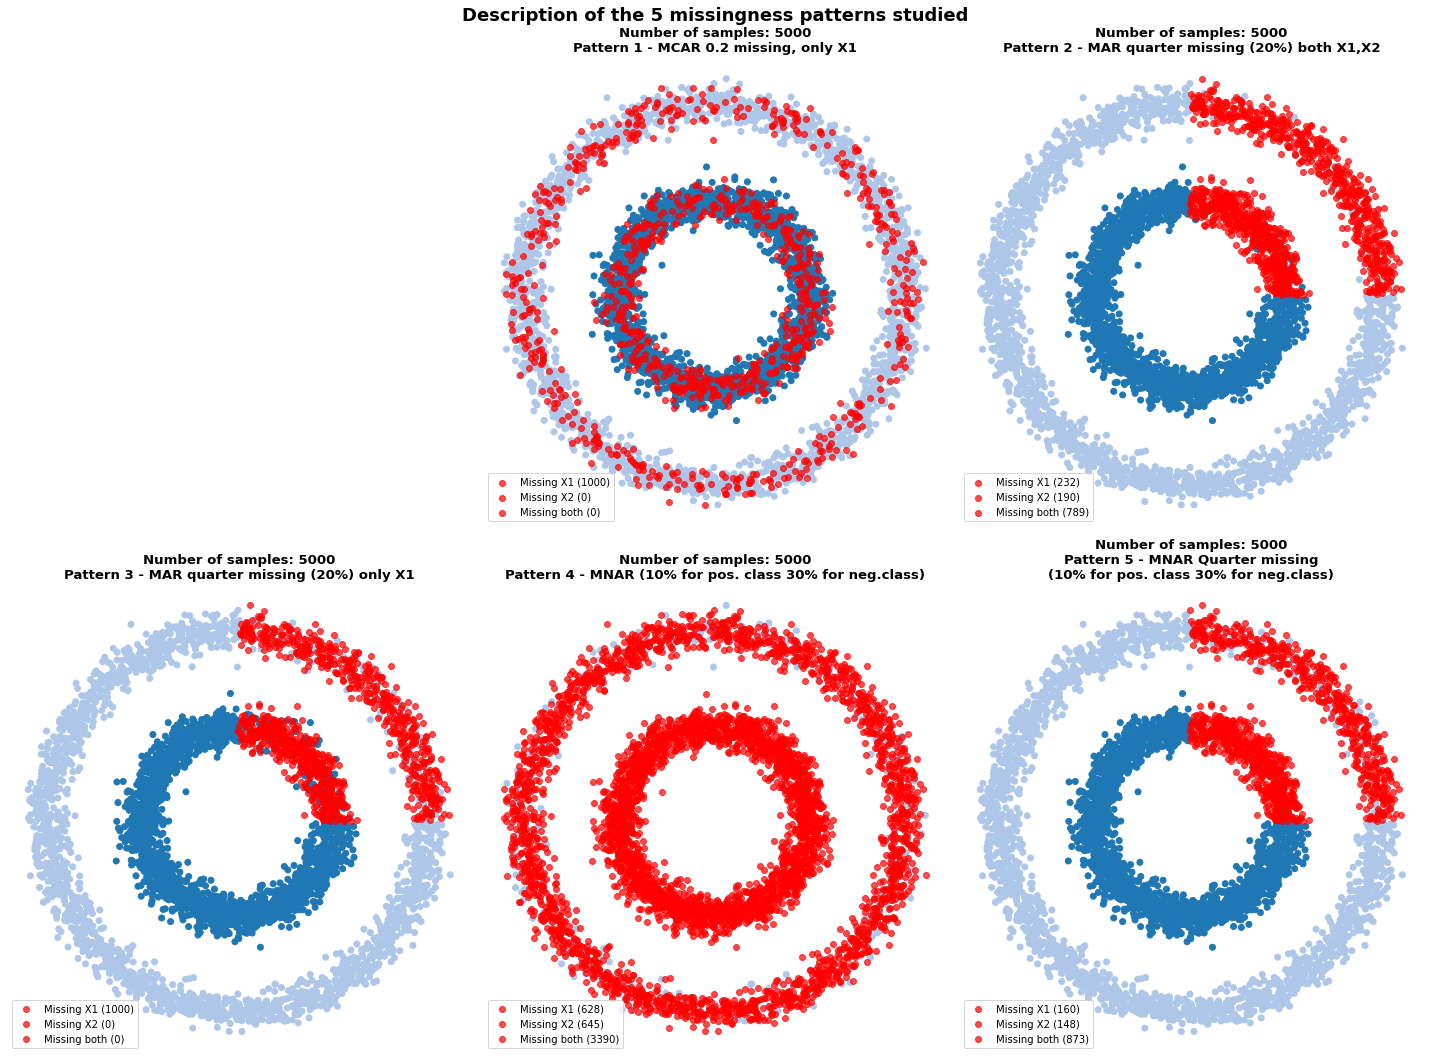

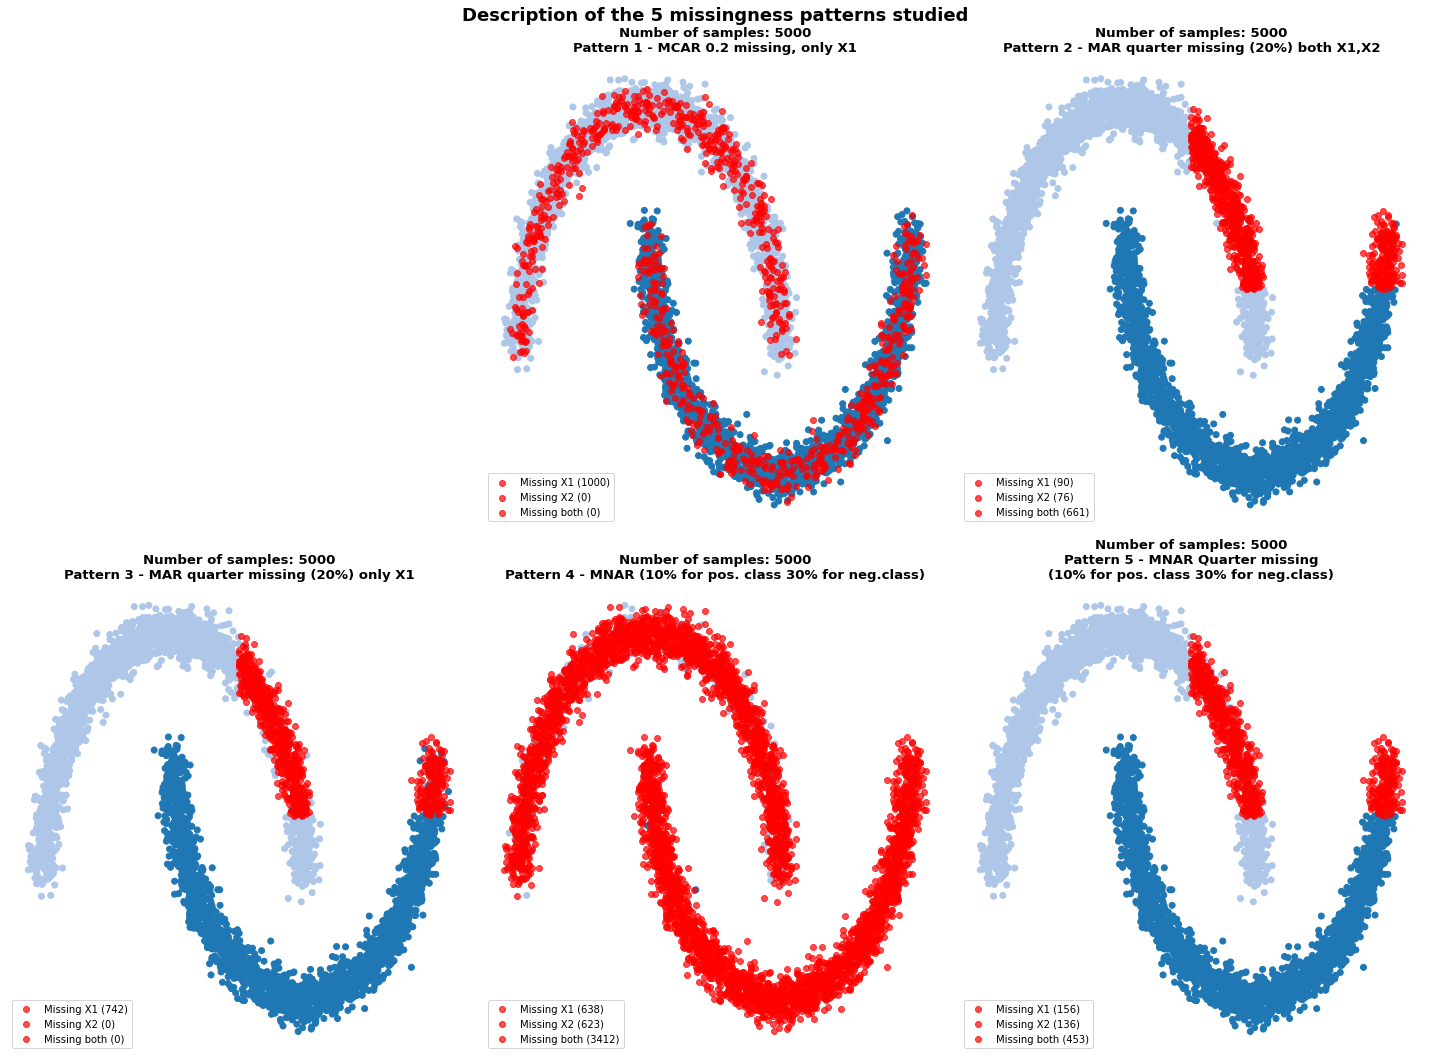

In [48]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = 5000
imbalance_ratio = .5
ratio_of_missing_values = .2
verbosity=0


for dataset_name in ['circles', 'moons']:
    dataset_train = DatasetGenerator(dataset_name=dataset_name, 
                                    purpose='train',
                                    num_samples=5000, 
                                    imbalance_ratio=imbalance_ratio, 
                                    verbosity=0)


    fig, axes = plt.subplots(2, 3, figsize=(20, 15));axes = axes.flatten()
    fig.suptitle("Description of the 5 missingness patterns studied", fontsize=18, weight='bold')

    for i, missingness_pattern in enumerate([1, 2, 3, 4, 5]):

        # Creation of the missingness
        dataset_train.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)
        dataset_train.plot(ax=axes[i+1], title=True)
    [axes[i].axis('off') for i in range(len(axes))]; plt.tight_layout()
    
    

# Estimation of the distributions $f_{Z}$, $f_{X|Z}$, and $f_{Z|X}$.


1) We can reasonably say that the estimation of X doing imputation has reached its optimum, in the sense that it might be hard to build a better approximation of $f_{X_{i}}$ than what Matias proposed. 

2) Now, the goal is to explore the estimation of the $Z$ variable, that is associated with the missingness mechanism. we can investigate two kind of distributions related to Z, either the distribution of $f_{Z}$, living on $\{0,1\}^k$ when it states about the absence or presence of the coordinates $X_i$ of $X$ in the dataset, or the distributions $f_{Z|X}$ on  $X(\Omega)^k$, which informs about where in the feature space the coordinates of $X$ has the higher chance to be missing. 

3) The distributions $f_{Z|X}$ helps to answer the following questions for instance: does $X_1$ is missing more for low values of $X_1$ ? for low values of $X_2$ ? In other words, it helps at inference time in the following way: if $X_1$ is missing, and $X_2$ is known and has a certain value, maybe there is 100% chance that the value of $X_1$ would be in some regions of the feature space. 

4) In the future, the same work will be done taking into account the class, so that the diagnosis $Y$ can be taken into account and we might leverage some missingness information, in the case of MNAR mechanisms.


**Now the idea is to add to the "side" distributions, (or $P(X_1|Z)$)) when a coordinate is missing. The method is called `side_spaces`.**

In other words, when a coordinate is missing, let's say $x_1$, then the contribution of this sample is used to build the marginal of $x_2$, which is denoted as a "side space".



We just computed the distributions of the features knowing whether the data were missing or not:

$$P(X_2|Z_1)\qquad \text{and}\qquad P(X_1|Z_2),$$ 

Let's now compute the distribution of the missingness variables $Z_1$ and $Z_2$ in function of the feature themselves. This allows for instance to better understand in which regions of the feature space of $X_1$ and $X_2$ we have the more chance to miss a feature (MAR mechanism and MNAR mechanism). 

By applying the Bayes's Rule: 


\begin{align}
  P(Z_1=0|X_2)  &= \text{Probability that X1 is missing looking at X2 feature space} \\
              &= \tfrac{P(X_2|Z_1=0)P(Z_1=0)}{P(X_2)} \\
             &= \tfrac{P(X_2|Z_1=0)P(Z_1=0)}{P(X_2|Z_1=0)P(Z_1=0) + P(X_2|Z_1=1)P(Z_1=1)} 
\end{align}

We can recognize the Bernouilli probability that indicate the prior on the missingness, $P(Z_1)$, the side distribution computed above, based on the data for which one coordinate is unknown (e.g. $P(X_2|Z_1=0)$), and the marginal distribution of $X_2$, $P(X_2|Z_1=1)$.


TODO Replace with estimation mode!

Doing experiment 80!


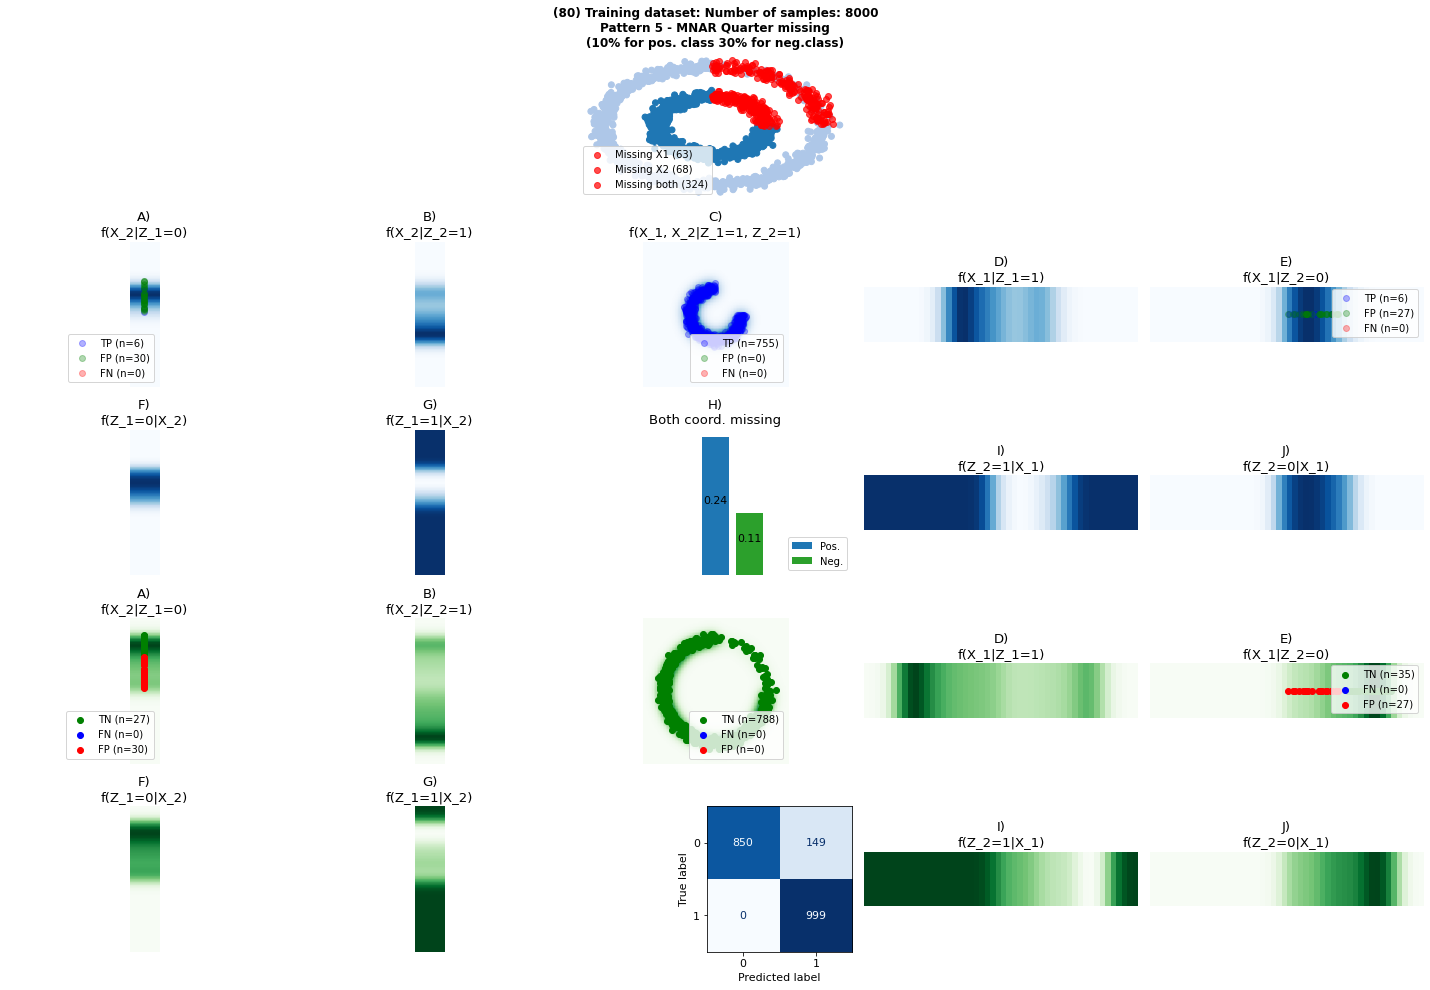

Sample: 999 positive and 999 negative samples (#p/#n=100%)



,0
Accuracy,0.925
F1 score (2 PPVxTPR/(PPV+TPR)),0.931
Matthews correlation coefficient (MCC),0.860
"Sensitivity, recall, hit rate, or true positive rate (TPR)",1.000
"Specificity, selectivity or true negative rate (TNR)",0.851
Precision or positive predictive value (PPV),0.870
Negative predictive value (NPV),1.000
Miss rate or false negative rate (FNR),0.000
False discovery rate (FDR=1-PPV),0.130
False omission rate (FOR=1-NPV),0.000


In [15]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = 5#MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN



verbosity=0

# Definition of the Train and Test datasets
proportion_train  = .8


dataset_train = DatasetGenerator(dataset_name=dataset_name, 
                                purpose='train',
                                num_samples=int(proportion_train*num_samples), 
                                imbalance_ratio=imbalance_ratio, 
                                verbosity=0)

dataset_test = DatasetGenerator(dataset_name=dataset_name, 
                                purpose='test',
                                num_samples=int((1-proportion_train)*num_samples), 
                                imbalance_ratio=imbalance_ratio, 
                                verbosity=0)


# Creation of the missingness
dataset_train.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)
dataset_test.generate_missing_coordinates(missingness_pattern=missingness_pattern, verbosity=verbosity)

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=dataset_train, 
                  dataset_test=dataset_test, 
                  purpose='classification', 
                  previous_experiment=None, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)


# Estimate the distributions 
exp.fit()

# Estimate the distributions 
exp.predict()

# Plot results
exp.plot()

# Qualitative exploration of the results

Experiment 2 loaded successfully! :-)


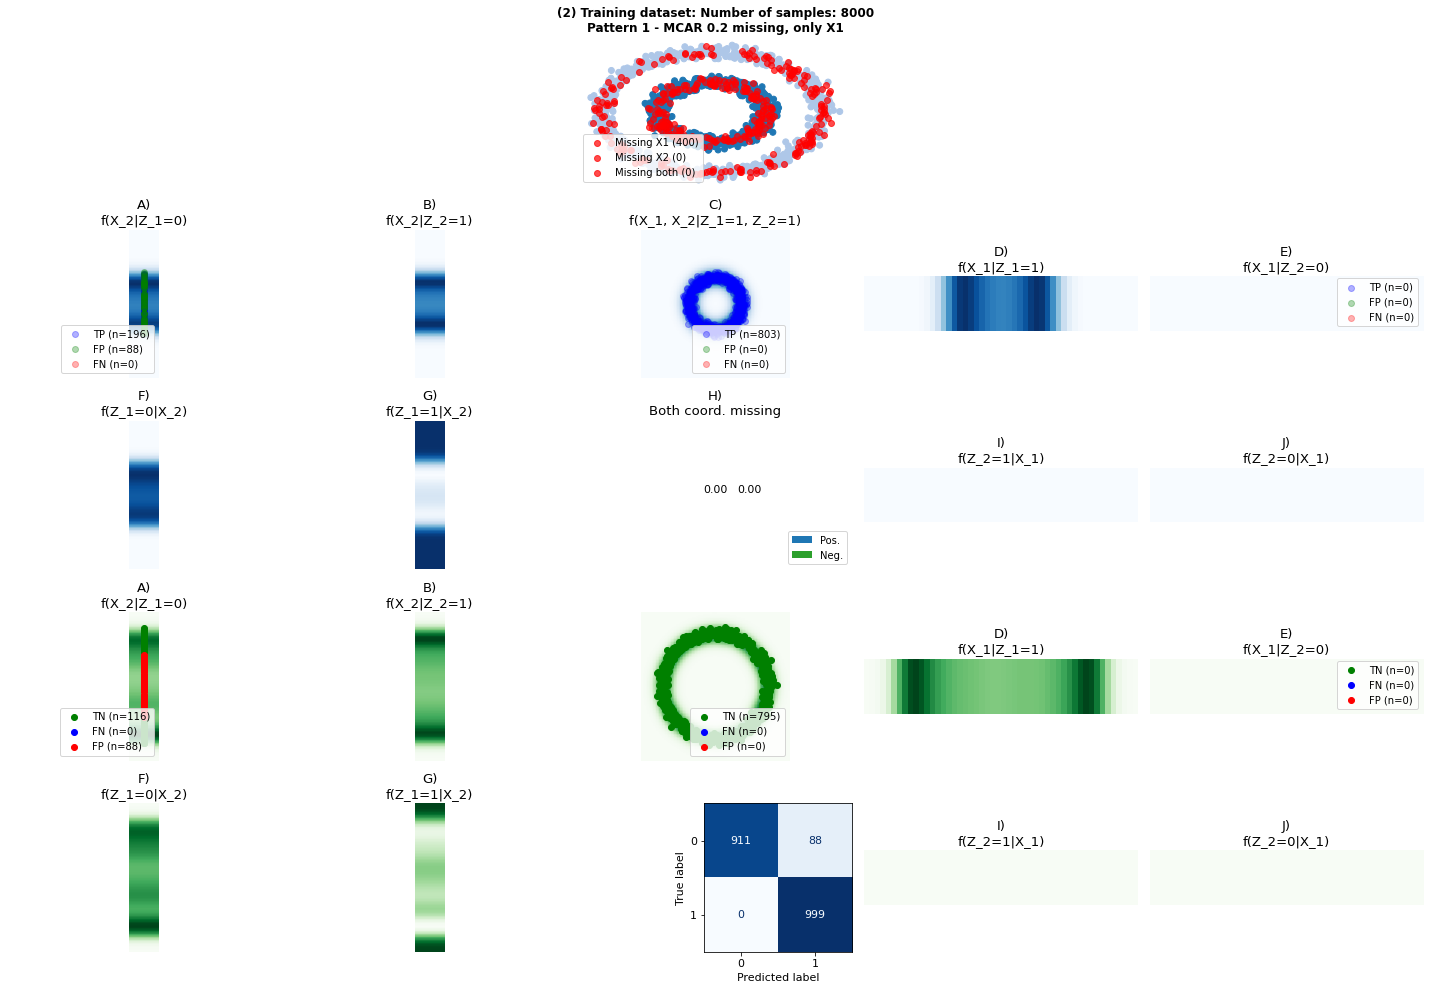

Sample: 999 positive and 999 negative samples (#p/#n=100%)



,0
Accuracy,0.956
F1 score (2 PPVxTPR/(PPV+TPR)),0.958
Matthews correlation coefficient (MCC),0.915
"Sensitivity, recall, hit rate, or true positive rate (TPR)",1.000
"Specificity, selectivity or true negative rate (TNR)",0.912
Precision or positive predictive value (PPV),0.919
Negative predictive value (NPV),1.000
Miss rate or false negative rate (FNR),0.000
False discovery rate (FDR=1-PPV),0.081
False omission rate (FOR=1-NPV),0.000


In [6]:
random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 4
Experiment 4 loaded successfully! :-)


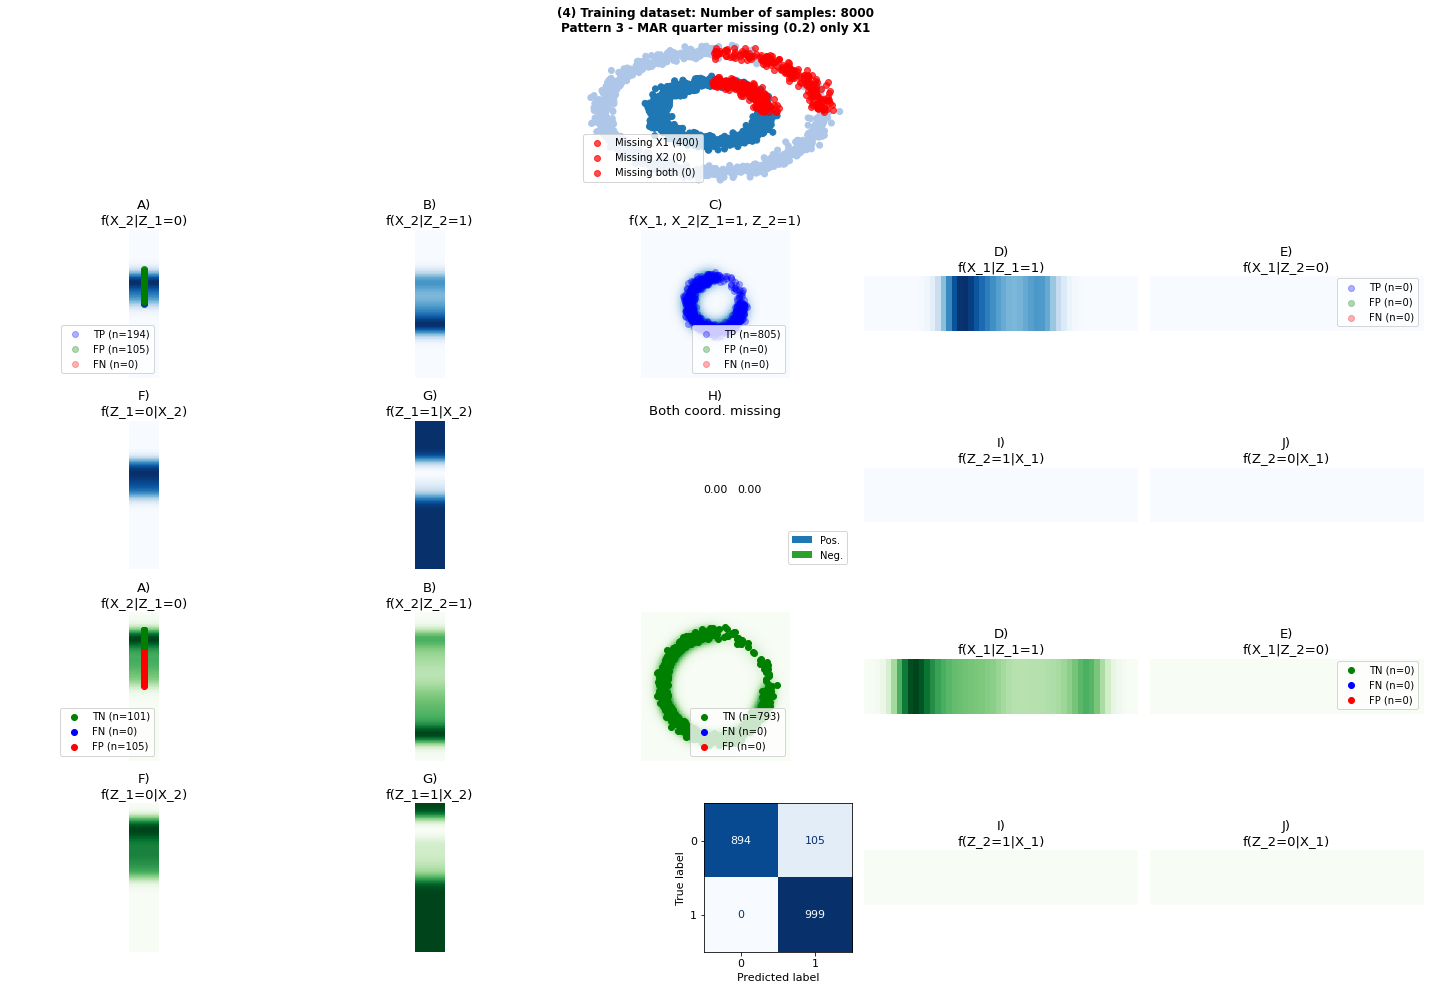

Sample: 999 positive and 999 negative samples (#p/#n=100%)



,0
Accuracy,0.947
F1 score (2 PPVxTPR/(PPV+TPR)),0.950
Matthews correlation coefficient (MCC),0.900
"Sensitivity, recall, hit rate, or true positive rate (TPR)",1.000
"Specificity, selectivity or true negative rate (TNR)",0.895
Precision or positive predictive value (PPV),0.905
Negative predictive value (NPV),1.000
Miss rate or false negative rate (FNR),0.000
False discovery rate (FDR=1-PPV),0.095
False omission rate (FOR=1-NPV),0.000


In [26]:

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 4
Experiment 34 loaded successfully! :-)


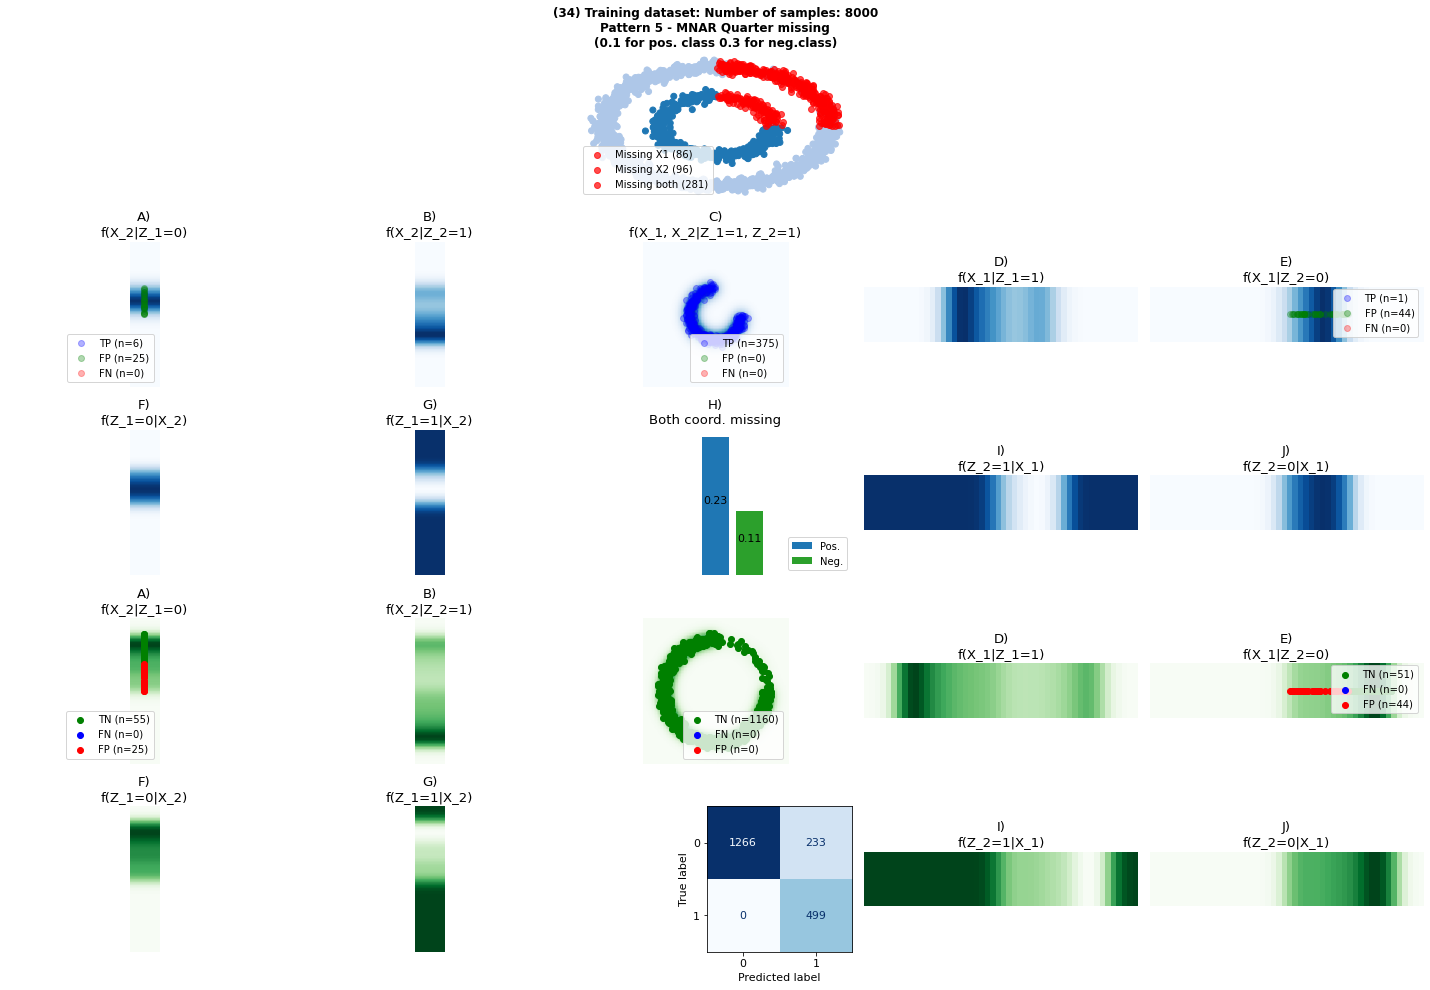

Sample: 499 positive and 1499 negative samples (#p/#n= 33%)



,0
Accuracy,0.883
F1 score (2 PPVxTPR/(PPV+TPR)),0.811
Matthews correlation coefficient (MCC),0.759
"Sensitivity, recall, hit rate, or true positive rate (TPR)",1.000
"Specificity, selectivity or true negative rate (TNR)",0.845
Precision or positive predictive value (PPV),0.682
Negative predictive value (NPV),1.000
Miss rate or false negative rate (FNR),0.000
False discovery rate (FDR=1-PPV),0.318
False omission rate (FOR=1-NPV),0.000


In [56]:
dataset_name = 'circles'

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=34, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 39
Experiment 39 loaded successfully! :-)


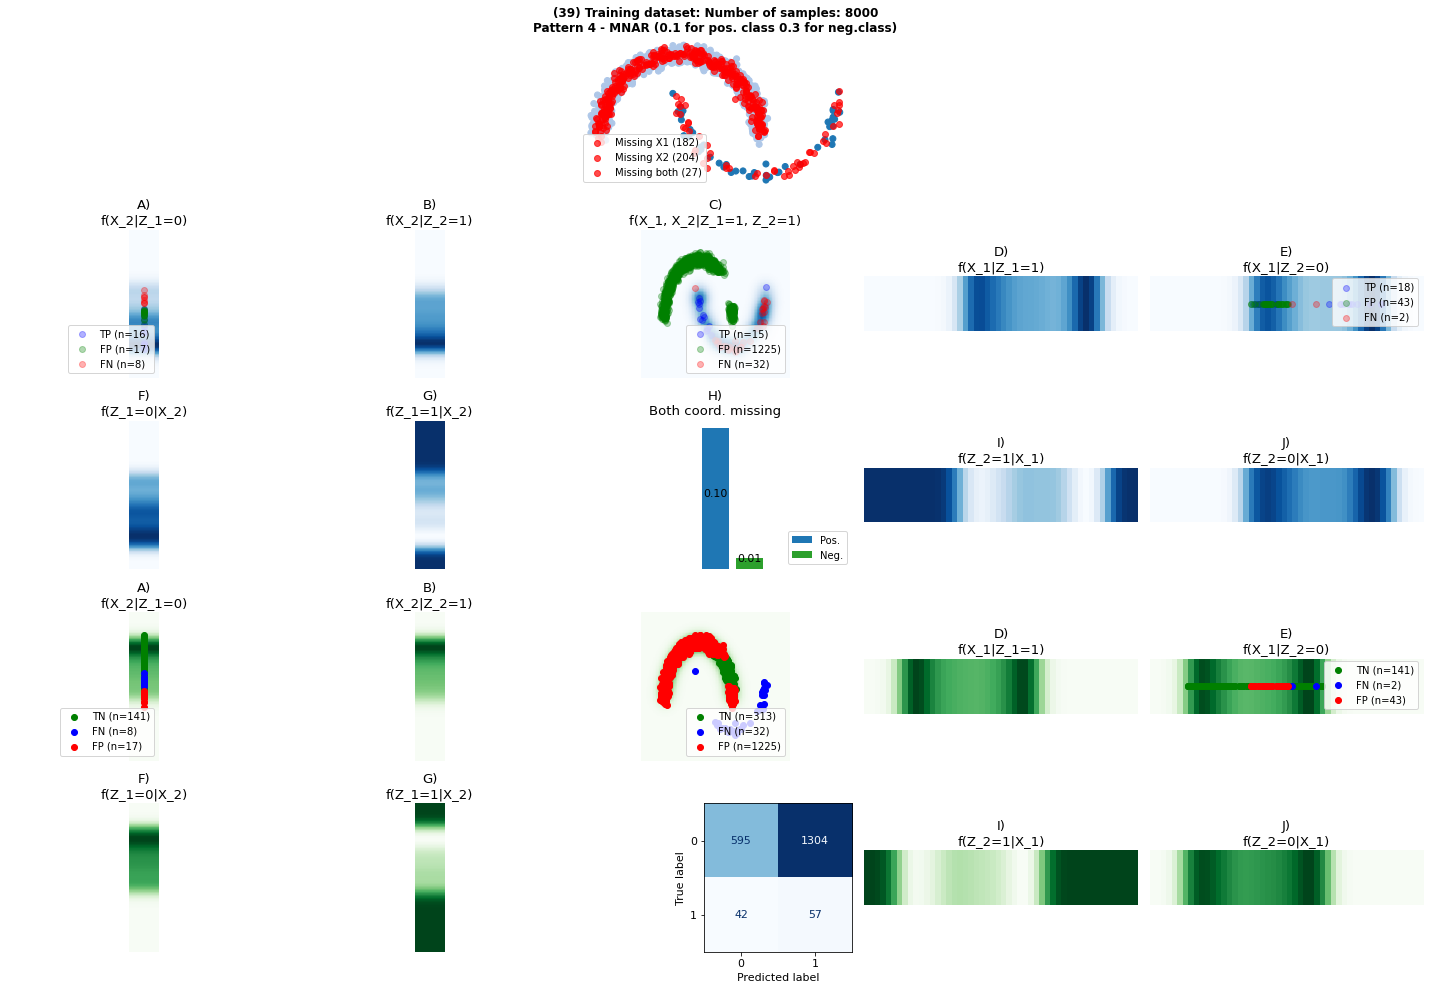

Sample: 99 positive and 1899 negative samples (#p/#n=  5%)



,0
Accuracy,0.326
F1 score (2 PPVxTPR/(PPV+TPR)),0.078
Matthews correlation coefficient (MCC),-0.052
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.576
"Specificity, selectivity or true negative rate (TNR)",0.313
Precision or positive predictive value (PPV),0.042
Negative predictive value (NPV),0.934
Miss rate or false negative rate (FNR),0.424
False discovery rate (FDR=1-PPV),0.958
False omission rate (FOR=1-NPV),0.066


In [28]:
dataset_name = 'moons'

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 75
Experiment 75 loaded successfully! :-)


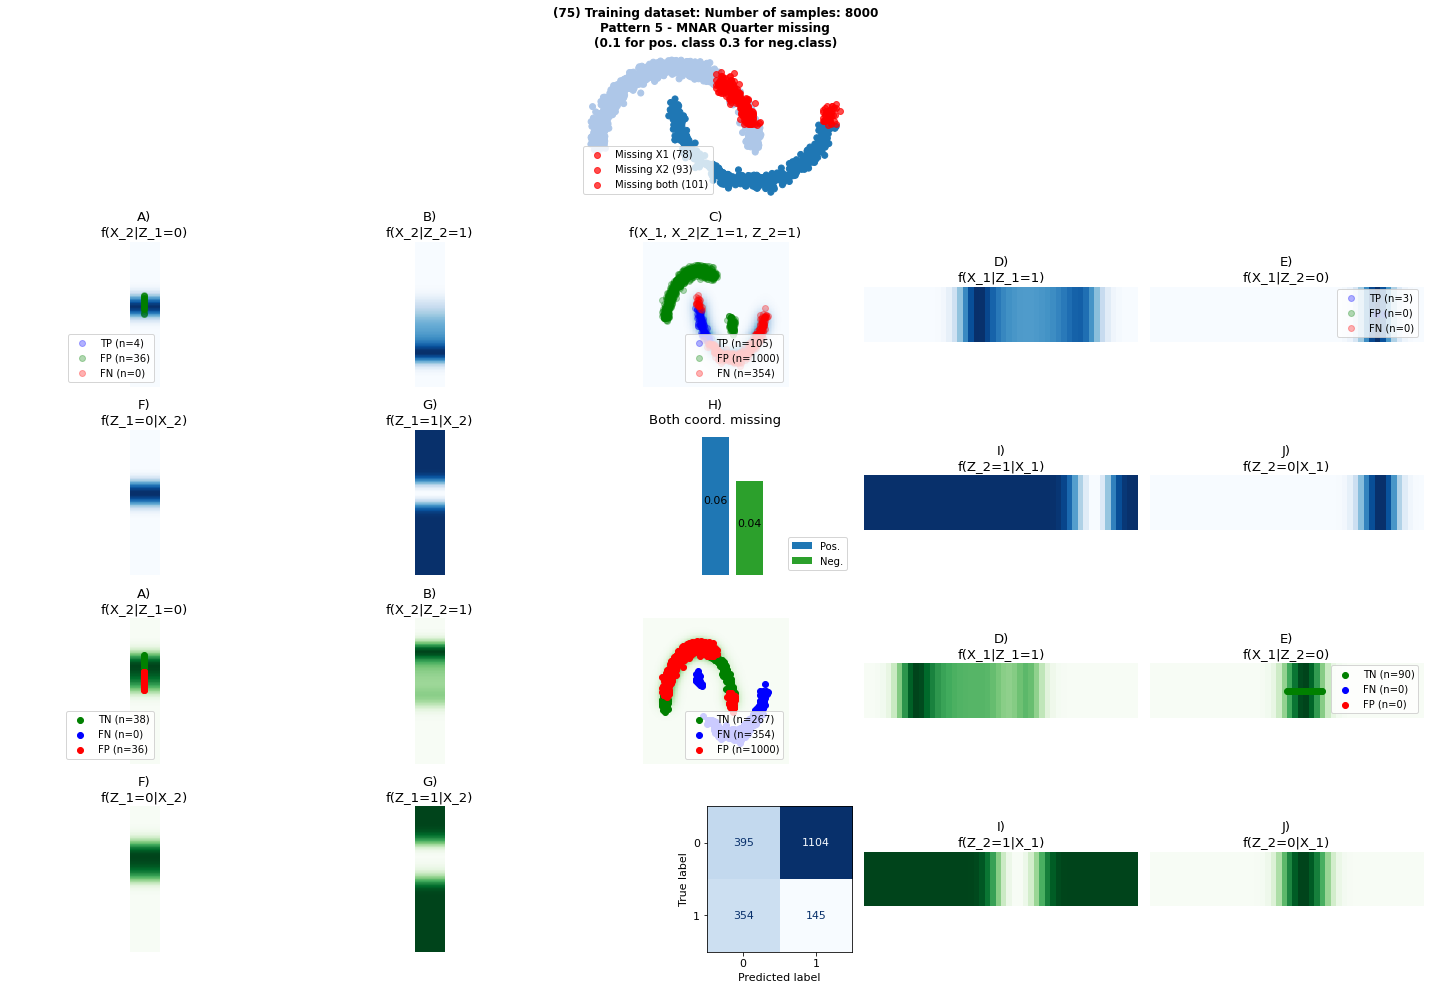

Sample: 499 positive and 1499 negative samples (#p/#n= 33%)



,0
Accuracy,0.270
F1 score (2 PPVxTPR/(PPV+TPR)),0.166
Matthews correlation coefficient (MCC),-0.399
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.291
"Specificity, selectivity or true negative rate (TNR)",0.264
Precision or positive predictive value (PPV),0.116
Negative predictive value (NPV),0.527
Miss rate or false negative rate (FNR),0.709
False discovery rate (FDR=1-PPV),0.884
False omission rate (FOR=1-NPV),0.473


In [40]:
dataset_name = 'moons'

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

#  Experiment 1) Comparison between $f_{X_2|Z_1=0, Z_2=1}$ and $f_{X_2|Z_1=1, Z_2=1}$ in the case of different missingness patterns.

We expect there are the same in the case of MCAR (no mutual information between X and Z).
There might be additional situation when there are the same, this experiment aims at investigate it for two datasets. 
    

1) We want to investigate here if we can verify that those two distributions are the same in the case of MCAR (no mutual information between X and Z).
2) We want to investigate how the distance between both evolve depending on the level of missing data, and on the mechanism. 

**Note on the experiment setting**
* We assume we have sufficient data to estimate accurately both distributions, so setting the number of sample N is high so that there are enough missing data, and the resolution of the grid h is high, to compute meaningful distance.
* We use both the Jensen-Shannon divergence and the Earth Movers' distance to compare distributions.


*The goal is to reach better intuitions on how Z affect X, to infer how we can use it. 
Nothe that here we set ourselves the missingness mechanism. In real settings, we might not have this information and so run hypothesis testing, or we may have prior knowdledge.*



Experiment 45 loaded successfully! :-)


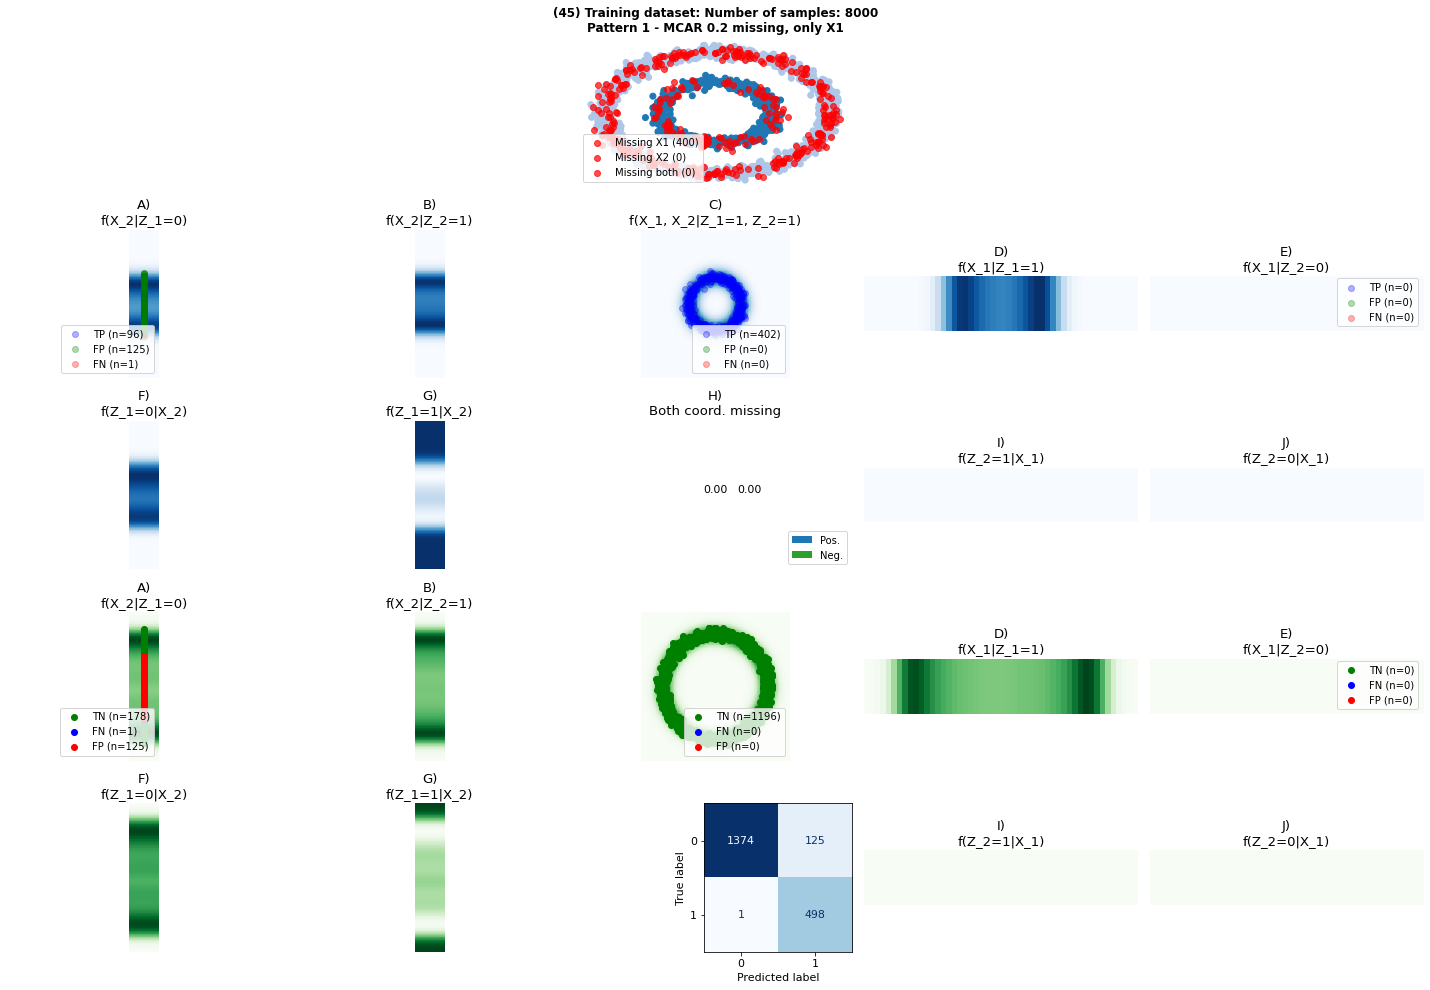

Sample: 499 positive and 1499 negative samples (#p/#n= 33%)



,0
Accuracy,0.937
F1 score (2 PPVxTPR/(PPV+TPR)),0.888
Matthews correlation coefficient (MCC),0.855
"Sensitivity, recall, hit rate, or true positive rate (TPR)",0.998
"Specificity, selectivity or true negative rate (TNR)",0.917
Precision or positive predictive value (PPV),0.799
Negative predictive value (NPV),0.999
Miss rate or false negative rate (FNR),0.002
False discovery rate (FDR=1-PPV),0.201
False omission rate (FOR=1-NPV),0.001


In [29]:
random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
#print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=45,#random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

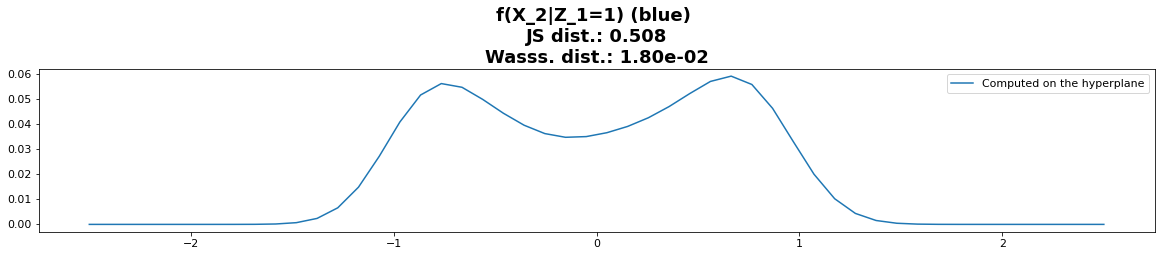

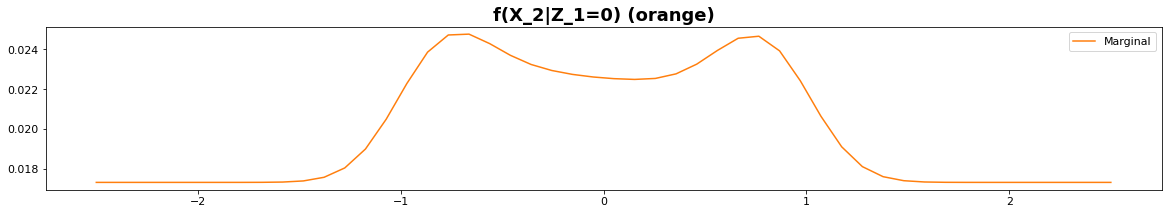

In [31]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_2, color='tab:blue',label='Computed on the hyperplane')
plt.title("f(X_2|Z_1=1) (blue) \nJS dist.: {:.3f}\nWasss. dist.: {:.2e}".format(distance.jensenshannon(exp.dist_pos.f_2, exp.dist_pos.f_2_marginal, 2.0), wasserstein_distance(exp.dist_pos.f_2, exp.dist_pos.f_2_marginal)), weight='bold', fontsize=18)
plt.legend()

fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_2_marginal, color='tab:orange', label='Marginal')
plt.title("f(X_2|Z_1=0) (orange)", weight='bold', fontsize=18)
plt.legend()


Experiment 44 loaded successfully! :-)


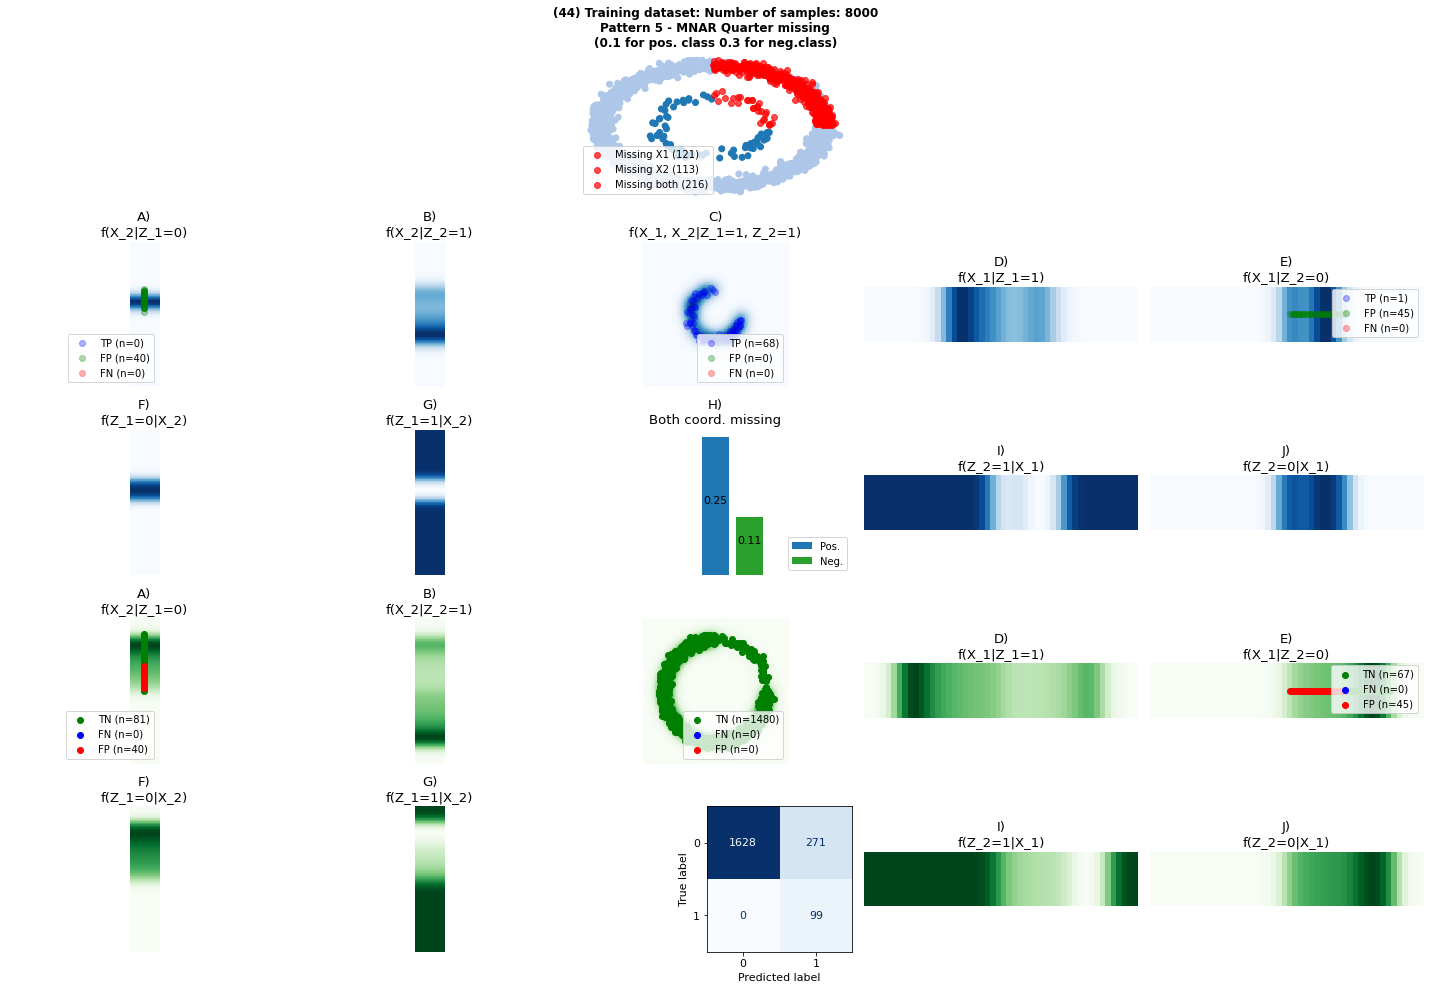

Sample: 99 positive and 1899 negative samples (#p/#n=  5%)



,0
Accuracy,0.864
F1 score (2 PPVxTPR/(PPV+TPR)),0.422
Matthews correlation coefficient (MCC),0.479
"Sensitivity, recall, hit rate, or true positive rate (TPR)",1.000
"Specificity, selectivity or true negative rate (TNR)",0.857
Precision or positive predictive value (PPV),0.268
Negative predictive value (NPV),1.000
Miss rate or false negative rate (FNR),0.000
False discovery rate (FDR=1-PPV),0.732
False omission rate (FOR=1-NPV),0.000


In [11]:
random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
#print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=44,#random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)
`
# Plot results
exp.plot()

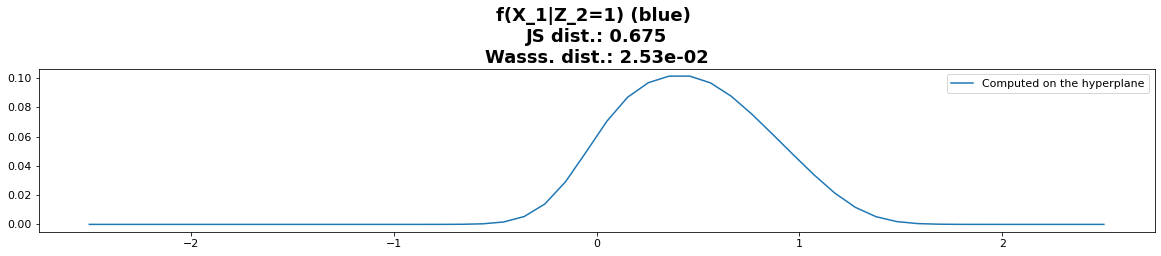

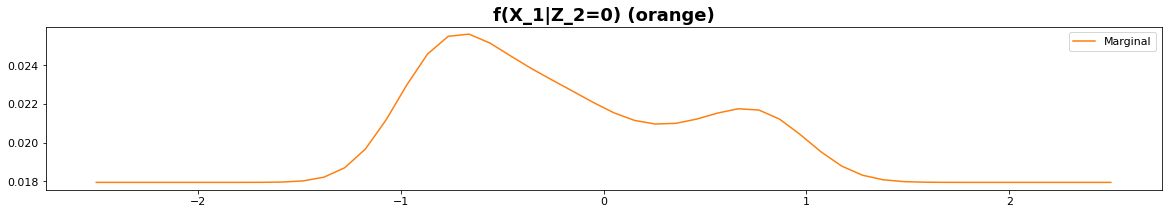

In [26]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_1, color='tab:blue',label='Computed on the hyperplane')
plt.title("f(X_1|Z_2=1) (blue) \nJS dist.: {:.3f}\nWasss. dist.: {:.2e}".format(distance.jensenshannon(exp.dist_pos.f_1, exp.dist_pos.f_1_marginal, 2.0), wasserstein_distance(exp.dist_pos.f_1, exp.dist_pos.f_1_marginal)), weight='bold', fontsize=18)
plt.legend()

fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_1_marginal, color='tab:orange', label='Marginal')
plt.title("f(X_1|Z_2=0) (orange)", weight='bold', fontsize=18)
plt.legend()


In [ ]:
df = create_df()

df[(df['dataset_name']==dataset_name) & (df['missingness_pattern']==5)]#['experiment_number'].sample(1).iloc[0].astype(int)

# Dataframe with all the results - Analysis


In [37]:
columns = ['dataset_name', 'experiment_number','num_samples', 'imbalance_ratio', 'missingness_pattern',
                   'missingness_mechanism', 'ratio_of_missing_values', 'missing_X1',
                   'missing_X2', 'missing_first_quarter', 'ratio_missing_per_class_0','ratio_missing_per_class_1',
                   'Accuracy', 'F1', 'Sensitivity', 'Specificity', 'Precision']


df = create_df()
df_moons = df.query(" `dataset_name` == 'moons' ")
df_circles = df.query(" `dataset_name` == 'circles' ")

#df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio").drop_duplicates()

display(df[columns])
print("\n\n\n")
display(df_moons[columns].groupby('missingness_pattern').describe())
print("\n\n\n")

display(df_circles[columns].groupby('missingness_pattern').describe())
print("\n\n\n")

df_moons[columns].groupby('missingness_pattern').describe()


#df.query( " `dataset_name`==@dataset_name & `missingness_pattern`==1").drop_duplicates()


UnboundLocalError: local variable 'experiment_data' referenced before assignment

In [36]:
df_circles

,dataset_name,experiment_number,purpose,fitted,num_samples,imbalance_ratio,missingness_pattern,missingness_mechanism,ratio_of_missing_values,missing_X1,missing_X2,missing_first_quarter,ratio_missing_per_class_0,ratio_missing_per_class_1,Accuracy,F1,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR,resolution,bandwidth,estimation_time_0,estimation_time_1
126,circles,61,classification,True,1999,0.50,3,MAR,0.2,True,False,True,NaN,NaN,0.947,0.950,0.900,1.000,0.895,0.905,0.905,1.000,0.000,0.095,0.000,50,0.2,128.185033,124.709135
127,circles,59,classification,True,1999,0.15,2,MAR,0.2,True,True,True,NaN,NaN,0.833,0.642,0.617,1.000,0.804,0.473,0.473,1.000,0.000,0.527,0.000,50,0.2,184.006076,32.824662
128,circles,66,classification,True,1999,0.30,1,MCAR,0.2,True,False,None,NaN,NaN,0.937,0.905,0.866,0.990,0.915,0.833,0.833,0.995,0.010,0.167,0.005,50,0.2,179.446238,82.976611
130,circles,68,classification,True,1999,0.30,3,MAR,0.2,True,False,True,NaN,NaN,0.938,0.907,0.870,1.000,0.912,0.830,0.830,1.000,0.000,0.170,0.000,50,0.2,173.754132,74.987449
131,circles,57,classification,True,1999,0.10,5,MNAR,None,True,True,True,0.152585,0.288945,0.869,0.603,0.607,1.000,0.854,0.432,0.432,1.000,0.000,0.568,0.000,50,0.2,207.431561,21.308825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,circles,13,classification,True,1999,0.25,2,MAR,0.2,True,True,True,NaN,NaN,0.930,0.855,0.810,0.820,0.967,0.893,0.893,0.942,0.180,0.107,0.058,50,0.2,156.305504,52.656557
205,circles,5,classification,True,1999,0.50,4,MNAR,None,True,True,False,0.100000,0.300000,0.953,0.955,0.909,0.996,0.910,0.917,0.917,0.996,0.004,0.083,0.004,50,0.2,117.748305,107.652035
206,circles,14,classification,True,1999,0.25,3,MAR,0.2,True,False,True,NaN,NaN,0.935,0.885,0.851,1.000,0.913,0.793,0.793,1.000,0.000,0.207,0.000,50,0.2,176.929899,59.143796
207,circles,22,classification,True,1999,0.05,1,MCAR,0.2,True,False,None,NaN,NaN,0.921,0.556,0.594,1.000,0.917,0.385,0.385,1.000,0.000,0.615,0.000,50,0.2,231.710443,12.423150


In [ ]:
missingness_pattern = 1

df_moons.query( "`missingness_pattern`==@missingness_pattern")
